# Compare clustering metrics (NMI, ARI) or ct-merged and optimized clusters
Do on pancreas data (as has all integrations).

In [1]:
from glob import glob
import pickle as pkl
import numpy as np
import pandas as pd

import seaborn as sb
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [2]:
path_res='/om2/user/khrovati/data/cross_system_integration/eval/pancreas_conditions_MIA_HPAP2/integration/'

In [8]:
res=[]
# Runs that finished
for f in glob(path_res+'*/scib_metrics_scaled.pkl'):
    run=f.replace('scib_metrics_scaled.pkl','')
    args=pd.Series(vars(pkl.load(open(run+'args.pkl','rb'))))
    metrics=pd.Series(pkl.load(open(run+'scib_metrics.pkl','rb')))
    data=pd.concat([args,metrics])
    name=run.split('/')[-2]
    data.name=name
    res.append(data)
res=pd.concat(res,axis=1).T

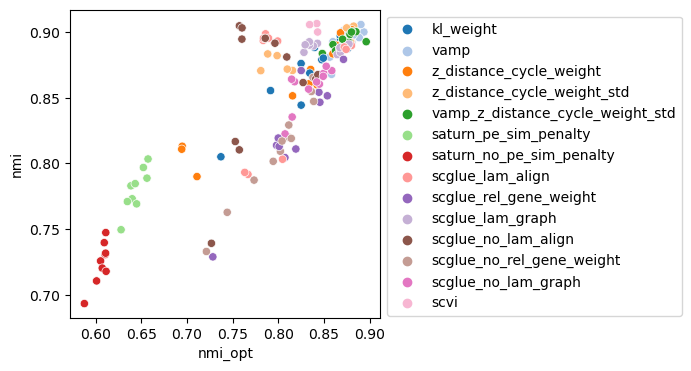

In [9]:
rcParams['figure.figsize']=(4,4)
sb.scatterplot(x='nmi_opt',y='nmi',hue='params_opt',data=res,palette='tab20')
plt.legend(bbox_to_anchor=(1,1))

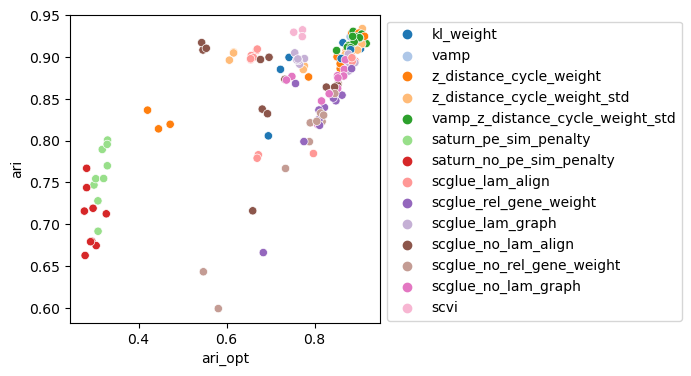

In [10]:
rcParams['figure.figsize']=(4,4)
sb.scatterplot(x='ari_opt',y='ari',hue='params_opt',data=res,palette='tab20')
plt.legend(bbox_to_anchor=(1,1))

C: It seems that non-optmized clustering metrics (annotation based) mainly give too large scores. So it may be better to actually use optimized ones.

C: Saturn separates some cell types into blobs and it may not be directly related to poor batch correction.

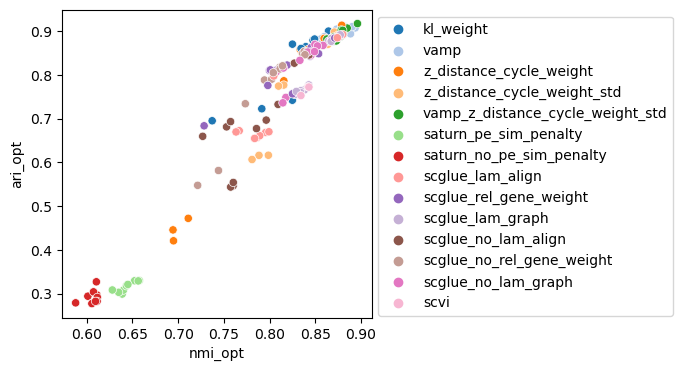

In [11]:
rcParams['figure.figsize']=(4,4)
sb.scatterplot(x='nmi_opt',y='ari_opt',hue='params_opt',data=res,palette='tab20')
plt.legend(bbox_to_anchor=(1,1))

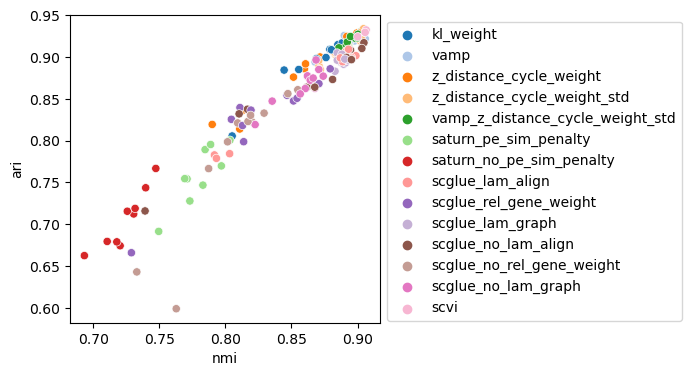

In [12]:
rcParams['figure.figsize']=(4,4)
sb.scatterplot(x='nmi',y='ari',hue='params_opt',data=res,palette='tab20')
plt.legend(bbox_to_anchor=(1,1))